# Week 3 - Probability Distributions 1 and 2

Learning contents:

1. Frequenist's approach
    - Bernoulli distribution function
    - Maximum Likelihood
    - Display distribution
2. Bayesian approach
    - Binomial distribution
    - Display Binomial distribution for different m
    - Maximum posterior
3. Multinomial variables
    - Generate data
    - Frequenist's approach
        - Multinomial Bernoulli distribution function
        - Maximum likelihood
    - Bayesian approach
        - Maximum posterior
4. Gaussian distribution
    - Distribution function
    - Generate data
    - Display data
    - Frequenist's approach
        - Maximum likelihood
        - Display distribution
    - Bayesian approach
        - Generate data
        - Variance is known, mean is unknown
        - Display mean estimation for different N

## Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import exp, sqrt, factorial
from collections import Counter
from scipy.special import comb
from scipy.stats import beta
from scipy.stats import multivariate_normal, norm

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate Data

In [2]:
random.seed(2605)

def weighted_coin(heads=0.7, tails=0.3):
    total = heads + tails
    value = random.random() * total
    result = 0 if value <= tails else 1
    return result


def generate_data(size):
    return list(map(
        lambda i: weighted_coin(),
        range(size)
    ))


train_size = 26
train_data = generate_data(train_size)

<BarContainer object of 2 artists>

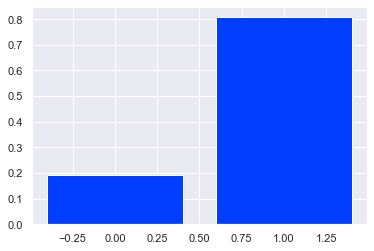

In [3]:
counter = Counter(train_data)
plt.bar(counter.keys(), list(map(lambda a: a / train_size, counter.values())))

## 1) Frequenist's approach

### 1.1) Bernoulli distribution function

In [4]:
def bern(x, mu):
    return mu**x * (1-mu)**(1-x)

### 1.2) Maximum Likelihood

In [5]:
def mu_maximum_likelihood(train_data):
    return 1/len(train_data) * sum(train_data)

mu_ml = mu_maximum_likelihood(train_data)

### 1.3) Display distribution

In [6]:
def display_bernoulli(mu, color='b'):

    xs = np.linspace(0., 1., 100)
    ys = list(map(
        lambda x: bern(x, mu),
        xs
    ))

    plt.plot(xs,ys, '-' + color)

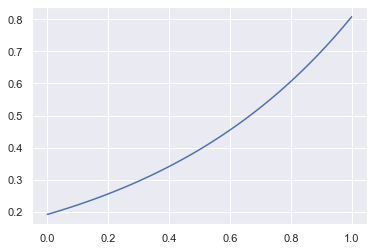

In [7]:
display_bernoulli(mu_ml)

## 2) Bayesian approach

### 2.1) Binomial distribution

In [8]:
def binomial(m, N, mu):
    return comb(N, m) * mu**m * (1-mu)**(N - m)

### 2.2) Display Binomial distribution for different m

In [9]:
def display_binomial(N, mu):
    xs = list(range(N))
    ys = list(map(
        lambda m: binomial(m, N, mu),
        xs
    ))
    
    plt.bar(xs, ys)

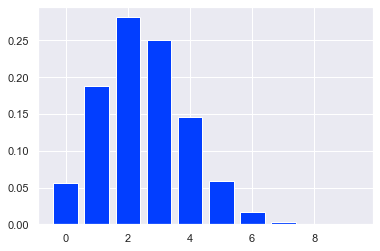

In [10]:
display_binomial(10, 0.25)

### 2.3) Maximum posterior

In [11]:
def mu_maximum_posterior(m, N, a, b):
    return (m+a)/(m+a+N-m+b)

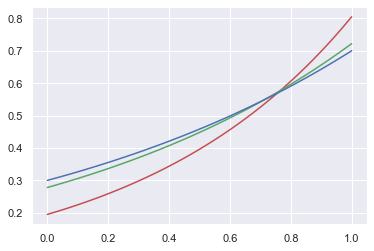

In [12]:
display_bernoulli(
    mu_maximum_posterior(sum(train_data), train_size, 0.1, 0.1), 'r'
)
display_bernoulli(
    mu_maximum_posterior(sum(train_data), train_size, 70, 30), 'g'
)
display_bernoulli(
    mu_maximum_posterior(sum(train_data), train_size, 7000, 3000), 'b'
)

## 3) Multinomial variables

### 3.1) Generate data

In [13]:
np.random.seed(26)

def generate_multinomial_data(size, probabilities):
    numbers = np.random.choice(len(probabilities), size, probabilities)
    
    result = np.zeros((numbers.size, len(probabilities)))
    result[np.arange(numbers.size), numbers] = 1
    return result
    
probabilities=[0.5, 0.1, 0.2, 0.1, 0.1]
multinomial_data = generate_multinomial_data(26, probabilities)
multinomial_data

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

### 3.2) Frequenist's approach

#### 3.2.1) Multinomial Bernoulli distribution function

In [14]:
def bern_multi(xs, mus):
    probvec = np.prod([mu_k**x_k for mu_k, x_k in zip(mus, xs)])
    return probvec

#### 3.2.2) Maximum likelihood
The result seems to be far from the probabilities we gave as input to generate_multinomial_data, but it fits with the data the function returned. By generating larger datasets and changing np seed(not included in below code) I found that the probabilities seemed to be $\mu_k=0.2$ for all $k$.

In [15]:
def multinomial_mu_maximum_likelihood(multinomial_data):
    N = np.shape(multinomial_data)[0]
    m = np.sum(multinomial_data, axis=(0))
    mu = np.array([m_k / N for m_k in m])
    return mu


multi_mu_ml = multinomial_mu_maximum_likelihood(multinomial_data)
multi_mu_ml

array([0.19230769, 0.11538462, 0.23076923, 0.23076923, 0.23076923])

### 3.3) Bayesian approach

#### 3.3.1) Maximum posterior
We see that the choice of alphas(ie. in some sense our choice of prior) can influence how much our data change our posterior. If we are very certain about the prior distribution, we can scale the alphas to be large, and even though the data might come from a completely different distribution (probabilities as suggested by MLE they are $\mu_k=0.2$) get estimates very close to what our 'guess' is of the prior.

In [16]:
def multinomial_mu_maximum_posterior(ms, N, alphas):
    mu = np.array([(alpha_k + m_k - 1) / (sum(alphas) + N - len(ms)) for alpha_k, m_k in zip(alphas, ms)])
    return mu

ms = list(map(lambda k: sum(multinomial_data[:, k]), range(len(multinomial_data[0]))))

In [17]:
print(multinomial_mu_maximum_posterior(ms, len(multinomial_data), [5, 1, 2, 1, 1]))
print(multinomial_mu_maximum_posterior(ms, len(multinomial_data), [50, 10, 20, 10, 10]))
print(multinomial_mu_maximum_posterior(ms, len(multinomial_data), [500, 100, 200, 100, 100]))

[0.29032258 0.09677419 0.22580645 0.19354839 0.19354839]
[0.44628099 0.09917355 0.20661157 0.12396694 0.12396694]
[0.49363369 0.09990206 0.20078355 0.10284035 0.10284035]


In [18]:
print(probabilities)

[0.5, 0.1, 0.2, 0.1, 0.1]


## 4) Gaussian distribution

### 4.1) Distribution function
From slide 13 in lecture 6

In [19]:
def multi_gaussian(x, mean, covariance):
    D = len(x)
    xvec = np.array(x)[:, np.newaxis]
    meanvec = np.array(mean)[:, np.newaxis]
    coef = 1 / ((2*np.pi)**(D/2) * np.linalg.det(covariance)**0.5)
    exp_factor = np.exp(-0.5*(xvec-meanvec).T @ np.linalg.inv(covariance) @ (xvec - meanvec))
    return coef * exp_factor

### 4.2) Generate data

In [20]:
def generate_multi_gaussian_data(size, mean, covariance):
    return np.array(multivariate_normal(mean=mean, cov=covariance).rvs(size=size, random_state=26))

target_mean = [1.7, -4]
target_cov = [[1, 0.1], [0.1, 1]]
multi_gaussian_data = generate_multi_gaussian_data(50, target_mean, target_cov)

### 4.3) Display data

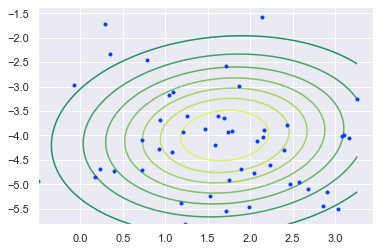

In [21]:
plt.plot(multi_gaussian_data[:, 0], multi_gaussian_data[:, 1], '.')

def display_gaussian_contour(data, mean, covariance, cmap='summer'):

    lx = min(data[:, 0])
    rx = max(data[:, 0])
    by = min(data[:, 1])
    uy = max(data[:, 1])

    x, y = np.mgrid[lx:rx:.01, by:uy:.01]
    pos = np.dstack((x, y))
    plt.contour(x, y, multivariate_normal(mean, covariance).pdf(pos), cmap=cmap)

display_gaussian_contour(multi_gaussian_data, target_mean, target_cov)

### 4.4) Frequenist's approach

#### 4.4.1) Maximum likelihood
Slide 17 and 18 lecture 6

In [22]:
def gaussian_mu_maximum_likelihood(multi_gaussian_data):
    N = multi_gaussian_data.shape[0]
    sums = np.sum(multi_gaussian_data, axis = (0))
    return 1/N*sums

g_mu_ml = gaussian_mu_maximum_likelihood(multi_gaussian_data)
g_mu_ml

array([ 1.64301733, -4.13747801])

In [23]:
def gaussian_covariance_maximum_likelihood(multi_gaussian_data, g_mu_ml):
    N = multi_gaussian_data.shape[0]
    cov_matrix = np.zeros((len(g_mu_ml), len(g_mu_ml)))
    mu_ml = g_mu_ml[:, np.newaxis]
    for x_n in multi_gaussian_data:
        x_new = np.array(x_n)[:, np.newaxis]
        cov_matrix += (x_new - mu_ml) @ (x_new - mu_ml).T
    return 1/(N-1) * cov_matrix

g_cov_ml = gaussian_covariance_maximum_likelihood(multi_gaussian_data, g_mu_ml)
g_cov_ml

array([[ 0.84757357, -0.18427121],
       [-0.18427121,  0.97482937]])

#### 4.4.2) Display distribution

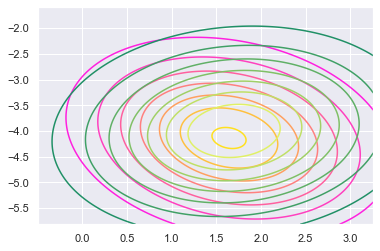

In [24]:
display_gaussian_contour(multi_gaussian_data, g_mu_ml, g_cov_ml, cmap='spring')
display_gaussian_contour(multi_gaussian_data, target_mean, target_cov, cmap='summer')

### 4.5) Bayesian approach

#### 4.5.1) Generate data

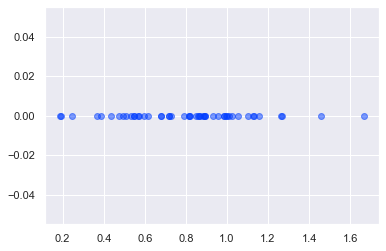

In [25]:
def generate_gaussian_data(size, mean, variance):
    return np.array(norm(mean, sqrt(variance)).rvs(size=size, random_state=26))

g_mean = 0.8
g_variance = 0.1
gaussian_data = generate_gaussian_data(50, g_mean, g_variance)

plt.scatter(gaussian_data, [0] * len(gaussian_data), alpha=0.5)

#### 4.5.2) Variance is known, mean is unknown
Slide 20 lecture 6

In [26]:
def gaussian_mu_maximum_posterior(gaussian_data, mu0, variance0, variance):
    N = len(gaussian_data)
    if N == 0:
        return mu0, variance0
    term_1 = variance / (N * variance0 + variance) * mu0
    term_2 = (N * variance0) / (N*variance0 + variance) * gaussian_mu_maximum_likelihood(gaussian_data)
    variance_N = 1 / ( 1/variance0 + N/variance)
    return term_1 + term_2, variance_N
g_mu_map, g_mu_var_map = gaussian_mu_maximum_posterior(gaussian_data, 0, g_variance, g_variance)
g_mu_map, g_mu_var_map

(0.78730491213259, 0.00196078431372549)

#### 4.5.3) Display mean estimation for different N

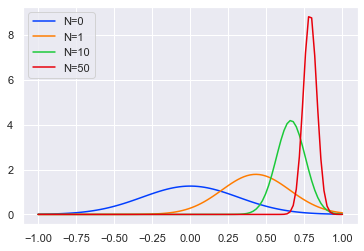

In [27]:
def display_mu_map(gaussian_data, mu0, variance0, variance):
    g_mu_map, g_mu_var_map = gaussian_mu_maximum_posterior(gaussian_data, 0, g_variance, g_variance)
    x = np.linspace(-1, 1, 100)
    y = norm(g_mu_map, sqrt(g_mu_var_map)).pdf(x)
    plt.plot(x, y, label='N=' + str(len(gaussian_data)))
    plt.legend()

display_mu_map(gaussian_data[:0], 0, g_variance, g_variance)
display_mu_map(gaussian_data[:1], 0, g_variance, g_variance)
display_mu_map(gaussian_data[:10], 0, g_variance, g_variance)
display_mu_map(gaussian_data, 0, g_variance, g_variance)